In [16]:
# import sys
# !{sys.executable} -m pip install pandas requests beautifulsoup4 matplotlib


In [17]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

# DATA INPUT 
csv_content = """daerah,harga,kamar_tidur,kamar_mandi,luas_tanah_m²,luas_bangunan_m²
"Balikpapan Kota,","7,90M",5,5,264,306
"Balikpapan Selatan,","1,12M",1,1,250,250
"Balikpapan Tengah,",925Jt,2,1,90,60
"Balikpapan Selatan,",575Jt,2,2,100,68
"Balikpapan Tengah,","695,70Jt",3,2,92,72
"Balikpapan Selatan,","1,65M",3,2,144,280
"Balikpapan Selatan,",795Jt,3,1,213,90
"Balikpapan Utara,","5,50M",6,7,400,350
"Balikpapan Timur,",Rp 3M,5,4,420,400
"Balikpapan Selatan,",Rp 5M,5,3,256,211
"Balikpapan Selatan,","1,25M",4,2,120,145
"Balikpapan Selatan,","1,40M",3,2,120,250
"Balikpapan Utara,","1,65M",4,2,165,220
"Balikpapan Utara,","1,85M",4,4,180,320
"Balikpapan Selatan,","2,50M",3,4,320,90
"Balikpapan Selatan,","5,50M",4,4,374,90
"Balikpapan Selatan,","1,79M",3,3,120,120
"Balikpapan Selatan,","4,50M",4,4,204,190
"Balikpapan Utara,","2,60M",3,3,165,300
"Balikpapan Utara,","1,15M",3,2,179,160
"Balikpapan Selatan,","1,70M",3,2,120,120
"Balikpapan Utara,",475Jt,3,1,124,60
"Balikpapan Selatan,","1,70M",4,3,160,100
"Balikpapan Utara,",450Jt,2,1,121,45
"Balikpapan Selatan,","1,80M",4,2,155,82
"Balikpapan Selatan,","1,40M",2,1,120,45
"Balikpapan Selatan,","1,30M",4,3,168,158
"Balikpapan Utara,","2,60M",3,3,165,330
"Balikpapan Utara,",Rp 2M,3,2,160,96
"Balikpapan Selatan,","3,25M",7,3,234,293
"Balikpapan Utara,","2,50M",4,2,307,250
"Balikpapan Utara,","1,90M",4,4,204,250
"Balikpapan Selatan,",Rp 4M,4,4,260,420
"Balikpapan Selatan,","6,37M",3,3,500,350
"Balikpapan Utara,","1,75M",4,2,216,170
"Balikpapan Utara,",450Jt,2,1,120,120
"Balikpapan Utara,",330Jt,2,1,84,36
"Balikpapan Utara,",450Jt,2,1,96,40
"Balikpapan Utara,",470Jt,2,1,140,45
"Balikpapan Utara,",550Jt,2,1,96,45
"Balikpapan Selatan,","2,50M",4,3,105,105
"Balikpapan Utara,",760Jt,4,2,156,156
"Balikpapan Selatan,",Rp 5M,5,4,276,276
"Balikpapan Selatan,",650Jt,2,1,84,84
"Balikpapan Selatan,","1,90M",3,2,72,72
"Balikpapan Selatan,",950Jt,3,2,198,198
"Balikpapan Kota,",Rp 12M,6,6,780,780
"Balikpapan Selatan,",Rp 5M,6,4,276,276
"Balikpapan Selatan,","6,60M",6,6,400,400
"Balikpapan Selatan,","1,60M",3,3,216,216
"Balikpapan Utara,","1,30M",3,3,135,135
"Balikpapan Selatan,","1,20M",5,3,260,260
"Balikpapan Utara,",750Jt,2,1,120,120
"Balikpapan Selatan,","2,85M",5,3,210,210
"Balikpapan Selatan,","2,30M",4,2,332,332
"Balikpapan Utara,",450Jt,2,1,120,45
"Balikpapan Selatan,","2,80M",5,3,296,296
"Balikpapan Selatan,","1,30M",4,3,200,200
"Balikpapan Selatan,","4,80M",6,5,395,395
"Balikpapan Selatan,","2,70M",5,4,180,180
"Balikpapan Selatan,",700Jt,2,1,104,50
"Balikpapan Utara,",380Jt,2,1,96,36
"Balikpapan Timur,",Rp 6M,2,1,720,90
"Balikpapan Utara,",Rp 3M,4,3,586,219
"Balikpapan Utara,",Rp 3M,3,3,318,200
"Balikpapan Selatan,","2,99M",3,3,60,220
"Balikpapan Utara,","2,15M",5,5,67,375
"Balikpapan Utara,","2,50M",3,3,27,105
"Balikpapan Utara,","1,75M",3,2,6,150
"Balikpapan Selatan,",795Jt,2,1,38,84
"Balikpapan Selatan,","2,10M",3,3,89,209
"Balikpapan Utara,","1,80M",6,3,4,204
"Balikpapan Selatan,","1,88M",3,2,18,98
"Balikpapan Utara,","1,80M",3,1,120,103
"Balikpapan Selatan,","1,60M",3,3,225,225
"Balikpapan Tengah,",880Jt,3,3,125,135
"Balikpapan Tengah,","4,50M",5,5,674,355
"Balikpapan Tengah,","5,20M",5,3,496,300
"Balikpapan Selatan,","5,50M",6,4,374,90
"Balikpapan Selatan,","1,50M",3,2,96,104
"Balikpapan Utara,","5,60M",2,3,870,260
"Balikpapan Tengah,","3,20M",5,4,210,245
"Balikpapan Timur,","1,95M",3,2,119,91
"Balikpapan Timur,","2,70M",3,2,105,119
"Balikpapan Selatan,","1,05M",3,2,145,120
"Balikpapan Tengah,","3,35M",5,4,220,340
"Balikpapan Selatan,","1,22M",3,2,72,50
"Balikpapan Selatan,","1,80M",5,2,150,230
"Balikpapan Selatan,","2,70M",3,2,150,219
"Balikpapan Selatan,","1,25M",3,2,120,140
"Balikpapan Tengah,",750Jt,2,1,105,56
"Balikpapan Selatan,",720Jt,2,1,96,36
"Balikpapan Kota,","1,55M",4,4,180,250
"Balikpapan Utara,","1,20M",3,2,157,111
"Balikpapan Selatan,","1,73M",3,4,205,180
"Balikpapan Selatan,","2,50M",8,8,340,200
"Balikpapan Utara,",950Jt,2,2,78,47
"Balikpapan Tengah,","1,25M",6,3,144,207
"Balikpapan Utara,","1,50M",3,2,160,120
"Balikpapan Utara,","3,20M",7,6,347,430
"Balikpapan Selatan,","1,70M",4,3,152,100
"Balikpapan Tengah,","6,65M",3,3,514,300
"Balikpapan Selatan,",Rp 2M,3,2,150,104
"Balikpapan Utara,","2,50M",4,3,200,105
"Balikpapan Tengah,","2,75M",4,3,240,110
"Balikpapan Timur,","2,75M",5,4,145,162
"Balikpapan Timur,","2,50M",3,3,555,250
"Balikpapan Tengah,","3,36M",6,4,495,320
"Balikpapan Timur,",885Jt,3,3,90,138
"Balikpapan Utara,","1,15M",2,2,78,47
"Balikpapan Selatan,","1,18M",4,2,120,150
"Balikpapan Timur,","4,50M",2,3,501,285
"Balikpapan Timur,","2,70M",4,3,311,225
"Balikpapan Selatan,",850Jt,2,2,90,54
"Balikpapan Selatan,","1,73M",3,2,205,180
"Balikpapan Selatan,",850Jt,3,1,95,60
"Balikpapan Utara,","5,60M",2,3,870,260
"Balikpapan Selatan,",900Jt,4,2,120,130
"Balikpapan Tengah,","2,70M",4,4,243,180
"Balikpapan Tengah,","1,35M",2,1,112,45
"Balikpapan Selatan,","1,85M",4,2,252,204
"Balikpapan Kota,","1,15M",3,2,90,90
"Balikpapan Timur,",800Jt,3,2,110,157
"Balikpapan Selatan,","1,25M",3,2,180,120
"Balikpapan Selatan,",515Jt,2,1,150,100
"Balikpapan Selatan,",Rp 10M,4,3,421,400
"Balikpapan Selatan,",Rp 7M,4,5,486,332
"Balikpapan Kota,","3,50M",2,2,940,500
"Balikpapan Kota,",950Jt,2,1,90,40
"Balikpapan Utara,","1,45M",4,3,130,190
"Balikpapan Selatan,","2,49M",3,2,295,120
"Balikpapan Utara,",850Jt,3,2,115,80
"Balikpapan Utara,",975Jt,3,2,105,100
"Balikpapan Utara,",850Jt,3,2,116,80
"Balikpapan Utara,","2,70M",4,3,318,318
"Balikpapan Selatan,","1,70M",3,2,126,126
"Balikpapan Utara,","4,67M",5,4,180,180
"Balikpapan Selatan,","2,70M",5,4,180,180
"Balikpapan Timur,",800Jt,2,3,104,104
"Balikpapan Selatan,",330Jt,2,1,140,140
"Balikpapan Selatan,",980Jt,3,1,160,100
"Balikpapan Selatan,",Rp 2M,2,1,324,120
"Balikpapan Selatan,",650Jt,2,1,90,45
"Balikpapan Selatan,",800Jt,3,3,162,90
"Balikpapan Selatan,",Rp 5M,4,2,330,200
"Balikpapan Selatan,","2,50M",4,3,340,200
"Balikpapan Selatan,","2,20M",5,4,200,200
"Balikpapan Selatan,","5,80M",6,4,625,500
"Balikpapan Selatan,","2,50M",3,2,135,135
"Balikpapan Selatan,","4,80M",6,5,395,250
"Balikpapan Selatan,","1,85M",3,2,204,142
"Balikpapan Utara,","1,50M",4,3,320,180
"Balikpapan Kota,","5,50M",9,3,668,120
"Balikpapan Selatan,","4,50M",4,5,554,355
"Balikpapan Tengah,","1,40M",5,4,294,250
"Balikpapan Tengah,",800Jt,4,4,300,150
"Balikpapan Selatan,","1,40M",4,4,153,258
"Balikpapan Utara,",450Jt,4,4,96,176
"Balikpapan Selatan,",930Jt,2,1,145,275
"Balikpapan Utara,",Rp 2M,9,9,170,320
"Balikpapan Tengah,",850Jt,3,3,130,280
"Balikpapan Kota,","2,80M",3,1,238,250
"Balikpapan Selatan,","1,65M",3,2,135,226
"Balikpapan Utara,","1,25M",3,2,72,142
"Balikpapan Utara,",950Jt,3,3,78,135
"Balikpapan Selatan,",700Jt,2,1,90,90
"Balikpapan Selatan,","1,30M",2,2,60,60
"Balikpapan Utara,","1,50M",3,2,340,410
"Balikpapan Utara,","9,80M",4,3,700,700
"Balikpapan Utara,","1,35M",4,2,150,150
"Balikpapan Utara,",870Jt,7,7,150,222
"Balikpapan Utara,","2,30M",3,2,294,294
"Balikpapan Selatan,","2,35M",4,4,135,170
"Balikpapan Selatan,","2,35M",3,3,135,170
"Balikpapan Tengah,",850Jt,3,2,213,180
"Balikpapan Selatan,","2,50M",3,2,105,210
"Balikpapan Selatan,",Rp 2M,3,2,204,142
"Balikpapan Selatan,",850Jt,3,1,160,100
"Balikpapan Selatan,","2,50M",6,4,150,234
"Balikpapan Selatan,","1,85M",3,3,140,190
"Balikpapan Selatan,","1,40M",2,2,78,80
"Balikpapan Tengah,",Rp 3M,5,2,427,220
"Balikpapan Selatan,","3,50M",4,2,240,320
"Balikpapan Selatan,","1,65M",4,2,175,250
"Balikpapan Kota,",900Jt,2,1,160,177
"Balikpapan Selatan,","1,55M",4,3,152,150
"Balikpapan Utara,",277Jt,2,1,72,36
"Balikpapan Selatan,","2,60M",4,3,220,120
"Balikpapan Timur,","1,70M",3,3,135,145
"Balikpapan Selatan,","1,10M",5,3,180,140
"Balikpapan Selatan,",690Jt,2,1,90,45
"Balikpapan Timur,",690Jt,2,1,90,45
"Balikpapan Selatan,","2,10M",3,3,128,117
"Balikpapan Barat,",695Jt,2,1,200,65
"Balikpapan Kota,",700Jt,4,2,149,100
"Balikpapan Utara,","1,35M",2,1,271,90
"Balikpapan Selatan,","1,20M",3,2,200,75
"Balikpapan Kota,",380Jt,2,1,122,70
"Balikpapan Selatan,","1,10M",3,2,150,102
"Balikpapan Selatan,",780Jt,5,3,120,140
"Balikpapan Selatan,","2,50M",4,4,315,210
"Balikpapan Selatan,",950Jt,2,1,96,60
"Balikpapan Selatan,",650Jt,3,1,81,81
"Balikpapan Utara,","3,20M",5,4,225,185
"Balikpapan Selatan,","4,20M",3,2,375,160
"Balikpapan Selatan,",950Jt,2,2,78,47
"Balikpapan Selatan,","4,25M",3,3,325,300
"Balikpapan Selatan,",680Jt,2,1,104,52
"Balikpapan Utara,","2,50M",3,2,294,150
"Balikpapan Selatan,","2,60M",4,3,105,100
"Balikpapan Selatan,",Rp 2M,5,5,332,200
"Balikpapan Utara,","2,80M",3,3,228,185
"Balikpapan Selatan,",550Jt,2,1,90,30
"Balikpapan Utara,","1,75M",3,2,180,90
"Balikpapan Selatan,",590Jt,2,2,150,100
"Balikpapan Selatan,",Rp 2M,3,2,160,104
"Balikpapan Selatan,",Rp 2M,3,2,204,140
"Balikpapan Utara,",875Jt,4,2,270,80
"Balikpapan Selatan,",675Jt,2,1,90,60
"Balikpapan Selatan,",380Jt,3,1,90,90
"Balikpapan Selatan,",Rp 5M,5,5,150,187
"Balikpapan Utara,",550Jt,2,1,196,87
"Balikpapan Selatan,",590Jt,2,2,109,80
"Balikpapan Selatan,","2,60M",4,4,165,300
"Balikpapan Selatan,",Rp 5M,4,3,400,380
"Balikpapan Selatan,","6,50M",3,3,673,500
"Balikpapan Selatan,","3,50M",3,3,363,130
"Balikpapan Tengah,",Rp 1M,3,2,319,150
"Balikpapan Selatan,","1,20M",4,4,150,180
"Balikpapan Tengah,","1,30M",6,3,209,339
"Balikpapan Selatan,","1,20M",4,2,120,144
"Balikpapan Selatan,",450Jt,2,1,96,42
"Balikpapan Timur,",880Jt,3,2,90,70
"Balikpapan Selatan,","1,50M",3,3,150,200
"Balikpapan Selatan,","1,50M",3,3,160,160
"Balikpapan Kota,","1,50M",4,2,105,96
"Balikpapan Kota,","4,50M",5,4,400,236
"Balikpapan Utara,","1,60M",3,3,90,120
"Balikpapan Utara,","1,40M",3,2,96,104
"Balikpapan Utara,","1,10M",3,2,100,60
"Balikpapan Utara,","2,10M",4,3,200,220
"Balikpapan Selatan,",700Jt,3,2,150,80
"Balikpapan Utara,","1,60M",7,5,224,72
"Balikpapan Selatan,",500Jt,2,1,84,45
"Balikpapan Kota,",730Jt,2,1,120,70
"Balikpapan Timur,","1,90M",5,5,180,230
"Balikpapan Selatan,",850Jt,3,2,198,198
"Balikpapan Selatan,","2,50M",15,14,200,460
"Balikpapan Selatan,","2,50M",3,3,150,200
"Balikpapan Kota,","1,90M",4,4,287,125
"Balikpapan Timur,",760Jt,2,1,119,89
"Balikpapan Utara,",900Jt,2,2,150,110
"Balikpapan Selatan,",730Jt,3,2,175,75
"Balikpapan Barat,",570Jt,2,1,200,61
"Balikpapan Selatan,",800Jt,3,2,145,120
"Balikpapan Kota,","1,20M",4,4,150,120
"Balikpapan Selatan,",980Jt,2,1,102,100
"Balikpapan Utara,","1,55M",3,2,150,145
"Balikpapan Selatan,","6,50M",4,3,363,270
"Balikpapan Selatan,",850Jt,3,4,72,90
"Balikpapan Selatan,","3,50M",3,2,180,90
"Balikpapan Selatan,","2,50M",2,2,180,90
"Balikpapan Selatan,",Rp 2M,3,2,102,70
"Balikpapan Utara,",600Jt,3,2,105,70
"Balikpapan Selatan,","2,10M",4,3,180,180
"Balikpapan Selatan,","3,80M",4,3,220,250
"Balikpapan Selatan,","1,30M",3,2,165,80
"Balikpapan Utara,",Rp 2M,4,3,117,150
"Balikpapan Utara,","3,50M",3,4,252,117
"Balikpapan Selatan,",Rp 2M,3,2,216,150
"Balikpapan Utara,","4,80M",5,4,396,400
"Balikpapan Selatan,","1,30M",2,1,131,57
"Balikpapan Utara,","1,70M",3,2,154,150
"Balikpapan Utara,","1,70M",3,3,90,114
"Balikpapan Utara,",830Jt,3,2,72,66
"Balikpapan Timur,",930Jt,3,2,120,100
"Balikpapan Kota,",Rp 5M,4,3,585,250
"Balikpapan Utara,",820Jt,3,2,72,66
"Balikpapan Selatan,","8,50M",4,6,190,380
"Balikpapan Selatan,",650Jt,2,2,120,52
"Balikpapan Selatan,",Rp 11M,8,6,358,458
"Balikpapan Utara,","4,50M",5,4,350,450
"Balikpapan Selatan,",680Jt,2,1,72,40
"Balikpapan Selatan,",Rp 7M,5,4,395,200
"Balikpapan Utara,","3,50M",3,4,252,117
"Balikpapan Selatan,",675Jt,3,2,120,100
"Balikpapan Selatan,","2,30M",5,4,300,5
"Balikpapan Selatan,","1,90M",3,4,112,144
"Balikpapan Selatan,","1,20M",2,2,90,72
"Balikpapan Kota,",800Jt,2,2,153,75
"Balikpapan Kota,",850Jt,3,2,331,102
"Balikpapan Selatan,",Rp 3M,3,2,276,150
"Balikpapan Timur,","1,20M",2,2,162,70
"Balikpapan Timur,","1,60M",3,3,98,140
"Balikpapan Selatan,","4,50M",3,3,465,265
"Balikpapan Tengah,",695Jt,2,1,200,65
"Balikpapan Utara,",700Jt,4,2,149,100
"Balikpapan Selatan,","2,70M",4,2,332,120
"Balikpapan Selatan,",850Jt,2,2,60,120
"Balikpapan Selatan,","3,60M",4,4,280,225
"Balikpapan Selatan,","2,15M",3,3,126,88
"Balikpapan Utara,","1,60M",5,4,180,220
"Balikpapan Selatan,","3,80M",4,4,280,225
"Balikpapan Selatan,",Rp 5M,4,2,330,200
"Balikpapan Selatan,",Rp 1M,4,2,127,107
"Balikpapan Selatan,","1,90M",4,2,180,150
"Balikpapan Selatan,","2,50M",3,3,222,160
"Balikpapan Selatan,","3,40M",5,4,190,250
"Balikpapan Selatan,","2,75M",3,2,95,160
"Balikpapan Timur,",600Jt,2,1,60,30
"Balikpapan Utara,",550Jt,3,3,77,90
"Balikpapan Selatan,","4,50M",3,3,490,330
"Balikpapan Selatan,","2,10M",4,4,204,250
"Balikpapan Timur,","1,20M",5,3,285,106
"Balikpapan Selatan,","2,50M",2,2,300,70
"Balikpapan Selatan,",875Jt,4,2,117,85
"Balikpapan Timur,","1,30M",3,3,140,98
"Balikpapan Utara,",950Jt,3,2,163,100
"Balikpapan Utara,","1,40M",5,4,180,220
"Balikpapan Utara,","1,60M",3,3,91,175
"Balikpapan Utara,","1,70M",2,1,112,56
"Balikpapan Selatan,","2,60M",5,3,300,200
"Balikpapan Selatan,",Rp 17M,5,4,660,770
"Balikpapan Selatan,","2,50M",3,2,300,140
"Balikpapan Kota,","1,60M",4,3,248,182
"Balikpapan Timur,","1,60M",6,4,200,183
"Balikpapan Timur,",880Jt,2,2,156,72
"Balikpapan Timur,","1,20M",3,2,105,91
"Balikpapan Timur,","1,50M",3,2,135,85
"Balikpapan Selatan,","2,80M",3,2,126,135
"Balikpapan Selatan,","2,25M",3,3,120,150
"Balikpapan Utara,","3,40M",5,4,190,300
"Balikpapan Kota,","2,20M",4,4,350,250
"Balikpapan Selatan,","2,50M",4,3,340,200
"Balikpapan Kota,",Rp 15M,67,6,660,750
"Balikpapan Selatan,","2,90M",4,2,220,200
"Balikpapan Selatan,","1,60M",3,3,135,200
"Balikpapan Selatan,","2,55M",4,3,165,250
"Balikpapan Utara,","3,50M",10,6,418,600
"Balikpapan Selatan,","3,50M",4,4,246,300
"Balikpapan Utara,",455Jt,2,1,97,39
"Balikpapan Tengah,",895Jt,4,2,325,240
"Balikpapan Selatan,","2,50M",4,3,419,250
"Balikpapan Utara,",385Jt,2,1,80,45
"Balikpapan Utara,",495Jt,2,1,110,42
"Balikpapan Utara,",550Jt,3,1,120,50
"Balikpapan Utara,","1,10M",2,2,450,114
"Balikpapan Utara,",275Jt,2,1,121,36
"Balikpapan Utara,","1,50M",4,3,170,120
"Balikpapan Utara,",430Jt,2,1,87,36
"Balikpapan Utara,",395Jt,3,1,120,50
"Balikpapan Utara,",500Jt,2,1,78,45
"Balikpapan Selatan,",500Jt,2,1,78,45
"Balikpapan Utara,",395Jt,2,1,96,36
"Balikpapan Selatan,","2,50M",11,10,375,260
"Balikpapan Selatan,","459,25Jt",2,1,102,36
"Balikpapan Utara,","383,68Jt",2,1,107,36
"Balikpapan Selatan,",690Jt,3,2,90,75
"Balikpapan Utara,",475Jt,2,1,120,45
"Balikpapan Timur,",385Jt,2,1,84,36
"Balikpapan Utara,",250Jt,2,1,160,36
"Balikpapan Selatan,",650Jt,2,1,119,119
"Balikpapan Selatan,","2,70M",4,3,180,210
"Balikpapan Selatan,","4,20M",3,4,550,550
"Balikpapan Selatan,","1,60M",3,2,216,100
"Balikpapan Tengah,",Rp 2M,3,2,763,280
"Balikpapan Selatan,",950Jt,3,2,150,120
"Balikpapan Kota,","1,50M",3,2,462,235
"Balikpapan Selatan,","1,10M",2,2,90,90
"Balikpapan Selatan,","3,30M",4,3,147,240
"Balikpapan Selatan,","1,15M",2,2,78,47
"Balikpapan Selatan,",950Jt,3,2,127,120
"""

df = pd.read_csv(io.StringIO(csv_content), sep=',', quotechar='"')

# PEMBERSIHAN DATA

# 1. Pembersihan Harga
def clean_price(price_str):
    if pd.isna(price_str) or price_str is None:
        return None
    
    # Menghapus 'Rp' dan spasi
    price_str = str(price_str).strip().replace('Rp', '').replace(' ', '')
    
    # Penanganan Miliar (M)
    if 'M' in price_str:
        num_part = price_str.replace('M', '').replace(',', '.') # Mengganti koma desimal
        try: return float(num_part) * 10**9
        except ValueError: return None
        
    # Penanganan Juta (Jt)
    elif 'Jt' in price_str:
        num_part = price_str.replace('Jt', '').replace(',', '.')
        try: return float(num_part) * 10**6
        except ValueError: return None
    
    return None

df['Harga (IDR)'] = df['harga'].apply(clean_price)

# 2. Pembersihan Daerah
# Menghapus koma di akhir nama daerah dan mengambil subdistrict
df['subdistrict'] = df['daerah'].str.replace(',', '').str.strip()

# 3. Konversi Kolom Numerik dan Filtering NaN
# Konversi kolom-kolom numerik yang sudah bersih
df['luas_tanah_m²'] = pd.to_numeric(df['luas_tanah_m²'], errors='coerce')
df['luas_bangunan_m²'] = pd.to_numeric(df['luas_bangunan_m²'], errors='coerce')
df['kamar_tidur'] = pd.to_numeric(df['kamar_tidur'], errors='coerce')
df['kamar_mandi'] = pd.to_numeric(df['kamar_mandi'], errors='coerce')

# Filter baris dengan nilai NaN pada Luas Tanah (m²)
df_filtered = df.dropna(subset=['luas_tanah_m²'])

# PENGELOMPOKAN DATA
print("\n" + "="*70)
print("## 🔢 Hasil Pengelompokan Data per Kecamatan 🏠")
print("="*70)

# A. Jumlah Data per Kecamatan
count_by_subdistrict = df_filtered['subdistrict'].value_counts().rename('Jumlah Data').to_frame()
print("### A. Jumlah Data")
print(count_by_subdistrict.to_string()) 

print("\n" + "-"*70)

# B. Rata-rata Harga per Kecamatan (IDR Numerik Murni)
avg_price_by_subdistrict = df_filtered.groupby('subdistrict')['Harga (IDR)'].mean().sort_values(ascending=False).to_frame()
avg_price_by_subdistrict.columns = ['Harga Rata-rata (IDR)']

# Format harga menjadi integer murni dengan pemisah ribuan (titik)
avg_price_by_subdistrict['Harga Rata-rata (IDR) Numeric'] = (
    avg_price_by_subdistrict['Harga Rata-rata (IDR)']
    .round()
    .astype('Int64')
    .apply(lambda x: f'{x:,}'.replace(',', '.'))
)

print("### B. Harga Rata-rata (IDR Numerik Murni)")
print(avg_price_by_subdistrict[['Harga Rata-rata (IDR) Numeric']].to_string())


## 🔢 Hasil Pengelompokan Data per Kecamatan 🏠
### A. Jumlah Data
                    Jumlah Data
subdistrict                    
Balikpapan Selatan          195
Balikpapan Utara            101
Balikpapan Timur             27
Balikpapan Tengah            24
Balikpapan Kota              23
Balikpapan Barat              2

----------------------------------------------------------------------
### B. Harga Rata-rata (IDR Numerik Murni)
                   Harga Rata-rata (IDR) Numeric
subdistrict                                     
Balikpapan Kota                    3.222.173.913
Balikpapan Selatan                 2.371.098.718
Balikpapan Tengah                  2.097.945.833
Balikpapan Timur                   1.737.407.407
Balikpapan Utara                   1.702.680.000
Balikpapan Barat                     632.500.000


In [18]:
import pandas as pd
import numpy as np
import io

# =============================================================
# 1. DATA INPUT (Konten CSV Bersih Anda)
# =============================================================
csv_content = """daerah,harga,kamar_tidur,kamar_mandi,luas_tanah_m²,luas_bangunan_m²
"Balikpapan Kota,","7,90M",5,5,264,306
"Balikpapan Selatan,","1,12M",1,1,250,250
"Balikpapan Tengah,",925Jt,2,1,90,60
"Balikpapan Selatan,",575Jt,2,2,100,68
"Balikpapan Tengah,","695,70Jt",3,2,92,72
"Balikpapan Selatan,","1,65M",3,2,144,280
"Balikpapan Selatan,",795Jt,3,1,213,90
"Balikpapan Utara,","5,50M",6,7,400,350
"Balikpapan Timur,",Rp 3M,5,4,420,400
"Balikpapan Selatan,",Rp 5M,5,3,256,211
"Balikpapan Selatan,","1,25M",4,2,120,145
"Balikpapan Selatan,","1,40M",3,2,120,250
"Balikpapan Utara,","1,65M",4,2,165,220
"Balikpapan Utara,","1,85M",4,4,180,320
"Balikpapan Selatan,","2,50M",3,4,320,90
"Balikpapan Selatan,","5,50M",4,4,374,90
"Balikpapan Selatan,","1,79M",3,3,120,120
"Balikpapan Selatan,","4,50M",4,4,204,190
"Balikpapan Utara,","2,60M",3,3,165,300
"Balikpapan Utara,","1,15M",3,2,179,160
"Balikpapan Selatan,","1,70M",3,2,120,120
"Balikpapan Utara,",475Jt,3,1,124,60
"Balikpapan Selatan,","1,70M",4,3,160,100
"Balikpapan Utara,",450Jt,2,1,121,45
"Balikpapan Selatan,","1,80M",4,2,155,82
"Balikpapan Selatan,","1,40M",2,1,120,45
"Balikpapan Selatan,","1,30M",4,3,168,158
"Balikpapan Utara,","2,60M",3,3,165,330
"Balikpapan Utara,",Rp 2M,3,2,160,96
"Balikpapan Selatan,","3,25M",7,3,234,293
"Balikpapan Utara,","2,50M",4,2,307,250
"Balikpapan Utara,","1,90M",4,4,204,250
"Balikpapan Selatan,",Rp 4M,4,4,260,420
"Balikpapan Selatan,","6,37M",3,3,500,350
"Balikpapan Utara,","1,75M",4,2,216,170
"Balikpapan Utara,",450Jt,2,1,120,120
"Balikpapan Utara,",330Jt,2,1,84,36
"Balikpapan Utara,",450Jt,2,1,96,40
"Balikpapan Utara,",470Jt,2,1,140,45
"Balikpapan Utara,",550Jt,2,1,96,45
"Balikpapan Selatan,","2,50M",4,3,105,105
"Balikpapan Utara,",760Jt,4,2,156,156
"Balikpapan Selatan,",Rp 5M,5,4,276,276
"Balikpapan Selatan,",650Jt,2,1,84,84
"Balikpapan Selatan,","1,90M",3,2,72,72
"Balikpapan Selatan,",950Jt,3,2,198,198
"Balikpapan Kota,",Rp 12M,6,6,780,780
"Balikpapan Selatan,",Rp 5M,6,4,276,276
"Balikpapan Selatan,","6,60M",6,6,400,400
"Balikpapan Selatan,","1,60M",3,3,216,216
"Balikpapan Utara,","1,30M",3,3,135,135
"Balikpapan Selatan,","1,20M",5,3,260,260
"Balikpapan Utara,",750Jt,2,1,120,120
"Balikpapan Selatan,","2,85M",5,3,210,210
"Balikpapan Selatan,","2,30M",4,2,332,332
"Balikpapan Utara,",450Jt,2,1,120,45
"Balikpapan Selatan,","2,80M",5,3,296,296
"Balikpapan Selatan,","1,30M",4,3,200,200
"Balikpapan Selatan,","4,80M",6,5,395,395
"Balikpapan Selatan,","2,70M",5,4,180,180
"Balikpapan Selatan,",700Jt,2,1,104,50
"Balikpapan Utara,",380Jt,2,1,96,36
"Balikpapan Timur,",Rp 6M,2,1,720,90
"Balikpapan Utara,",Rp 3M,4,3,586,219
"Balikpapan Utara,",Rp 3M,3,3,318,200
"Balikpapan Selatan,","2,99M",3,3,60,220
"Balikpapan Utara,","2,15M",5,5,67,375
"Balikpapan Utara,","2,50M",3,3,27,105
"Balikpapan Utara,","1,75M",3,2,6,150
"Balikpapan Selatan,",795Jt,2,1,38,84
"Balikpapan Selatan,","2,10M",3,3,89,209
"Balikpapan Utara,","1,80M",6,3,4,204
"Balikpapan Selatan,","1,88M",3,2,18,98
"Balikpapan Utara,","1,80M",3,1,120,103
"Balikpapan Selatan,","1,60M",3,3,225,225
"Balikpapan Tengah,",880Jt,3,3,125,135
"Balikpapan Tengah,","4,50M",5,5,674,355
"Balikpapan Tengah,","5,20M",5,3,496,300
"Balikpapan Selatan,","5,50M",6,4,374,90
"Balikpapan Selatan,","1,50M",3,2,96,104
"Balikpapan Utara,","5,60M",2,3,870,260
"Balikpapan Tengah,","3,20M",5,4,210,245
"Balikpapan Timur,","1,95M",3,2,119,91
"Balikpapan Timur,","2,70M",3,2,105,119
"Balikpapan Selatan,","1,05M",3,2,145,120
"Balikpapan Tengah,","3,35M",5,4,220,340
"Balikpapan Selatan,","1,22M",3,2,72,50
"Balikpapan Selatan,","1,80M",5,2,150,230
"Balikpapan Selatan,","2,70M",3,2,150,219
"Balikpapan Selatan,","1,25M",3,2,120,140
"Balikpapan Tengah,",750Jt,2,1,105,56
"Balikpapan Selatan,",720Jt,2,1,96,36
"Balikpapan Kota,","1,55M",4,4,180,250
"Balikpapan Utara,","1,20M",3,2,157,111
"Balikpapan Selatan,","1,73M",3,4,205,180
"Balikpapan Selatan,","2,50M",8,8,340,200
"Balikpapan Utara,",950Jt,2,2,78,47
"Balikpapan Tengah,","1,25M",6,3,144,207
"Balikpapan Utara,","1,50M",3,2,160,120
"Balikpapan Utara,","3,20M",7,6,347,430
"Balikpapan Selatan,","1,70M",4,3,152,100
"Balikpapan Tengah,","6,65M",3,3,514,300
"Balikpapan Selatan,",Rp 2M,3,2,150,104
"Balikpapan Utara,","2,50M",4,3,200,105
"Balikpapan Tengah,","2,75M",4,3,240,110
"Balikpapan Timur,","2,75M",5,4,145,162
"Balikpapan Timur,","2,50M",3,3,555,250
"Balikpapan Tengah,","3,36M",6,4,495,320
"Balikpapan Timur,",885Jt,3,3,90,138
"Balikpapan Utara,","1,15M",2,2,78,47
"Balikpapan Selatan,","1,18M",4,2,120,150
"Balikpapan Timur,","4,50M",2,3,501,285
"Balikpapan Timur,","2,70M",4,3,311,225
"Balikpapan Selatan,",850Jt,2,2,90,54
"Balikpapan Selatan,","1,73M",3,2,205,180
"Balikpapan Selatan,",850Jt,3,1,95,60
"Balikpapan Utara,","5,60M",2,3,870,260
"Balikpapan Selatan,",900Jt,4,2,120,130
"Balikpapan Tengah,","2,70M",4,4,243,180
"Balikpapan Tengah,","1,35M",2,1,112,45
"Balikpapan Selatan,","1,85M",4,2,252,204
"Balikpapan Kota,","1,15M",3,2,90,90
"Balikpapan Timur,",800Jt,3,2,110,157
"Balikpapan Selatan,","1,25M",3,2,180,120
"Balikpapan Selatan,",515Jt,2,1,150,100
"Balikpapan Selatan,",Rp 10M,4,3,421,400
"Balikpapan Selatan,",Rp 7M,4,5,486,332
"Balikpapan Kota,","3,50M",2,2,940,500
"Balikpapan Kota,",950Jt,2,1,90,40
"Balikpapan Utara,","1,45M",4,3,130,190
"Balikpapan Selatan,","2,49M",3,2,295,120
"Balikpapan Utara,",850Jt,3,2,115,80
"Balikpapan Utara,",975Jt,3,2,105,100
"Balikpapan Utara,",850Jt,3,2,116,80
"Balikpapan Utara,","2,70M",4,3,318,318
"Balikpapan Selatan,","1,70M",3,2,126,126
"Balikpapan Utara,","4,67M",5,4,180,180
"Balikpapan Selatan,","2,70M",5,4,180,180
"Balikpapan Timur,",800Jt,2,3,104,104
"Balikpapan Selatan,",330Jt,2,1,140,140
"Balikpapan Selatan,",980Jt,3,1,160,100
"Balikpapan Selatan,",Rp 2M,2,1,324,120
"Balikpapan Selatan,",650Jt,2,1,90,45
"Balikpapan Selatan,",800Jt,3,3,162,90
"Balikpapan Selatan,",Rp 5M,4,2,330,200
"Balikpapan Selatan,","2,50M",4,3,340,200
"Balikpapan Selatan,","2,20M",5,4,200,200
"Balikpapan Selatan,","5,80M",6,4,625,500
"Balikpapan Selatan,","2,50M",3,2,135,135
"Balikpapan Selatan,","4,80M",6,5,395,250
"Balikpapan Selatan,","1,85M",3,2,204,142
"Balikpapan Utara,","1,50M",4,3,320,180
"Balikpapan Kota,","5,50M",9,3,668,120
"Balikpapan Selatan,","4,50M",4,5,554,355
"Balikpapan Tengah,","1,40M",5,4,294,250
"Balikpapan Tengah,",800Jt,4,4,300,150
"Balikpapan Selatan,","1,40M",4,4,153,258
"Balikpapan Utara,",450Jt,4,4,96,176
"Balikpapan Selatan,",930Jt,2,1,145,275
"Balikpapan Utara,",Rp 2M,9,9,170,320
"Balikpapan Tengah,",850Jt,3,3,130,280
"Balikpapan Kota,","2,80M",3,1,238,250
"Balikpapan Selatan,","1,65M",3,2,135,226
"Balikpapan Utara,","1,25M",3,2,72,142
"Balikpapan Utara,",950Jt,3,3,78,135
"Balikpapan Selatan,",700Jt,2,1,90,90
"Balikpapan Selatan,","1,30M",2,2,60,60
"Balikpapan Utara,","1,50M",3,2,340,410
"Balikpapan Utara,","9,80M",4,3,700,700
"Balikpapan Utara,","1,35M",4,2,150,150
"Balikpapan Utara,",870Jt,7,7,150,222
"Balikpapan Utara,","2,30M",3,2,294,294
"Balikpapan Selatan,","2,35M",4,4,135,170
"Balikpapan Selatan,","2,35M",3,3,135,170
"Balikpapan Tengah,",850Jt,3,2,213,180
"Balikpapan Selatan,","2,50M",3,2,105,210
"Balikpapan Selatan,",Rp 2M,3,2,204,142
"Balikpapan Selatan,",850Jt,3,1,160,100
"Balikpapan Selatan,","2,50M",6,4,150,234
"Balikpapan Selatan,","1,85M",3,3,140,190
"Balikpapan Selatan,","1,40M",2,2,78,80
"Balikpapan Tengah,",Rp 3M,5,2,427,220
"Balikpapan Selatan,","3,50M",4,2,240,320
"Balikpapan Selatan,","1,65M",4,2,175,250
"Balikpapan Kota,",900Jt,2,1,160,177
"Balikpapan Selatan,","1,55M",4,3,152,150
"Balikpapan Utara,",277Jt,2,1,72,36
"Balikpapan Selatan,","2,60M",4,3,220,120
"Balikpapan Timur,","1,70M",3,3,135,145
"Balikpapan Selatan,","1,10M",5,3,180,140
"Balikpapan Selatan,",690Jt,2,1,90,45
"Balikpapan Timur,",690Jt,2,1,90,45
"Balikpapan Selatan,","2,10M",3,3,128,117
"Balikpapan Barat,",695Jt,2,1,200,65
"Balikpapan Kota,",700Jt,4,2,149,100
"Balikpapan Utara,","1,35M",2,1,271,90
"Balikpapan Selatan,","1,20M",3,2,200,75
"Balikpapan Kota,",380Jt,2,1,122,70
"Balikpapan Selatan,","1,10M",3,2,150,102
"Balikpapan Selatan,",780Jt,5,3,120,140
"Balikpapan Selatan,","2,50M",4,4,315,210
"Balikpapan Selatan,",950Jt,2,1,96,60
"Balikpapan Selatan,",650Jt,3,1,81,81
"Balikpapan Utara,","3,20M",5,4,225,185
"Balikpapan Selatan,","4,20M",3,2,375,160
"Balikpapan Selatan,",950Jt,2,2,78,47
"Balikpapan Selatan,","4,25M",3,3,325,300
"Balikpapan Selatan,",680Jt,2,1,104,52
"Balikpapan Utara,","2,50M",3,2,294,150
"Balikpapan Selatan,","2,60M",4,3,105,100
"Balikpapan Selatan,",Rp 2M,5,5,332,200
"Balikpapan Utara,","2,80M",3,3,228,185
"Balikpapan Selatan,",550Jt,2,1,90,30
"Balikpapan Utara,","1,75M",3,2,180,90
"Balikpapan Selatan,",590Jt,2,2,150,100
"Balikpapan Selatan,",Rp 2M,3,2,160,104
"Balikpapan Selatan,",Rp 2M,3,2,204,140
"Balikpapan Utara,",875Jt,4,2,270,80
"Balikpapan Selatan,",675Jt,2,1,90,60
"Balikpapan Selatan,",380Jt,3,1,90,90
"Balikpapan Selatan,",Rp 5M,5,5,150,187
"Balikpapan Utara,",550Jt,2,1,196,87
"Balikpapan Selatan,",590Jt,2,2,109,80
"Balikpapan Selatan,","2,60M",4,4,165,300
"Balikpapan Selatan,",Rp 5M,4,3,400,380
"Balikpapan Selatan,","6,50M",3,3,673,500
"Balikpapan Selatan,","3,50M",3,3,363,130
"Balikpapan Tengah,",Rp 1M,3,2,319,150
"Balikpapan Selatan,","1,20M",4,4,150,180
"Balikpapan Tengah,","1,30M",6,3,209,339
"Balikpapan Selatan,","1,20M",4,2,120,144
"Balikpapan Selatan,",450Jt,2,1,96,42
"Balikpapan Timur,",880Jt,3,2,90,70
"Balikpapan Selatan,","1,50M",3,3,150,200
"Balikpapan Selatan,","1,50M",3,3,160,160
"Balikpapan Kota,","1,50M",4,2,105,96
"Balikpapan Kota,","4,50M",5,4,400,236
"Balikpapan Utara,","1,60M",3,3,90,120
"Balikpapan Utara,","1,40M",3,2,96,104
"Balikpapan Utara,","1,10M",3,2,100,60
"Balikpapan Utara,","2,10M",4,3,200,220
"Balikpapan Selatan,",700Jt,3,2,150,80
"Balikpapan Utara,","1,60M",7,5,224,72
"Balikpapan Selatan,",500Jt,2,1,84,45
"Balikpapan Kota,",730Jt,2,1,120,70
"Balikpapan Timur,","1,90M",5,5,180,230
"Balikpapan Selatan,",850Jt,3,2,198,198
"Balikpapan Selatan,","2,50M",15,14,200,460
"Balikpapan Selatan,","2,50M",3,3,150,200
"Balikpapan Kota,","1,90M",4,4,287,125
"Balikpapan Timur,",760Jt,2,1,119,89
"Balikpapan Utara,",900Jt,2,2,150,110
"Balikpapan Selatan,",730Jt,3,2,175,75
"Balikpapan Barat,",570Jt,2,1,200,61
"Balikpapan Selatan,",800Jt,3,2,145,120
"Balikpapan Kota,","1,20M",4,4,150,120
"Balikpapan Selatan,",980Jt,2,1,102,100
"Balikpapan Utara,","1,55M",3,2,150,145
"Balikpapan Selatan,","6,50M",4,3,363,270
"Balikpapan Selatan,",850Jt,3,4,72,90
"Balikpapan Selatan,","3,50M",3,2,180,90
"Balikpapan Selatan,","2,50M",2,2,180,90
"Balikpapan Selatan,",Rp 2M,3,2,102,70
"Balikpapan Utara,",600Jt,3,2,105,70
"Balikpapan Selatan,","2,10M",4,3,180,180
"Balikpapan Selatan,","3,80M",4,3,220,250
"Balikpapan Selatan,","1,30M",3,2,165,80
"Balikpapan Utara,",Rp 2M,4,3,117,150
"Balikpapan Utara,","3,50M",3,4,252,117
"Balikpapan Selatan,",Rp 2M,3,2,216,150
"Balikpapan Utara,","4,80M",5,4,396,400
"Balikpapan Selatan,","1,30M",2,1,131,57
"Balikpapan Utara,","1,70M",3,2,154,150
"Balikpapan Utara,","1,70M",3,3,90,114
"Balikpapan Utara,",830Jt,3,2,72,66
"Balikpapan Timur,",930Jt,3,2,120,100
"Balikpapan Kota,",Rp 5M,4,3,585,250
"Balikpapan Utara,",820Jt,3,2,72,66
"Balikpapan Selatan,","8,50M",4,6,190,380
"Balikpapan Selatan,",650Jt,2,2,120,52
"Balikpapan Selatan,",Rp 11M,8,6,358,458
"Balikpapan Utara,","4,50M",5,4,350,450
"Balikpapan Selatan,",680Jt,2,1,72,40
"Balikpapan Selatan,",Rp 7M,5,4,395,200
"Balikpapan Utara,","3,50M",3,4,252,117
"Balikpapan Selatan,",675Jt,3,2,120,100
"Balikpapan Selatan,","2,30M",5,4,300,5
"Balikpapan Selatan,","1,90M",3,4,112,144
"Balikpapan Selatan,","1,20M",2,2,90,72
"Balikpapan Kota,",800Jt,2,2,153,75
"Balikpapan Kota,",850Jt,3,2,331,102
"Balikpapan Selatan,",Rp 3M,3,2,276,150
"Balikpapan Timur,","1,20M",2,2,162,70
"Balikpapan Timur,","1,60M",3,3,98,140
"Balikpapan Selatan,","4,50M",3,3,465,265
"Balikpapan Tengah,",695Jt,2,1,200,65
"Balikpapan Utara,",700Jt,4,2,149,100
"Balikpapan Selatan,","2,70M",4,2,332,120
"Balikpapan Selatan,",850Jt,2,2,60,120
"Balikpapan Selatan,","3,60M",4,4,280,225
"Balikpapan Selatan,","2,15M",3,3,126,88
"Balikpapan Utara,","1,60M",5,4,180,220
"Balikpapan Selatan,","3,80M",4,4,280,225
"Balikpapan Selatan,",Rp 5M,4,2,330,200
"Balikpapan Selatan,",Rp 1M,4,2,127,107
"Balikpapan Selatan,","1,90M",4,2,180,150
"Balikpapan Selatan,","2,50M",3,3,222,160
"Balikpapan Selatan,","3,40M",5,4,190,250
"Balikpapan Selatan,","2,75M",3,2,95,160
"Balikpapan Timur,",600Jt,2,1,60,30
"Balikpapan Utara,",550Jt,3,3,77,90
"Balikpapan Selatan,","4,50M",3,3,490,330
"Balikpapan Selatan,","2,10M",4,4,204,250
"Balikpapan Timur,","1,20M",5,3,285,106
"Balikpapan Selatan,","2,50M",2,2,300,70
"Balikpapan Selatan,",875Jt,4,2,117,85
"Balikpapan Timur,","1,30M",3,3,140,98
"Balikpapan Utara,",950Jt,3,2,163,100
"Balikpapan Utara,","1,40M",5,4,180,220
"Balikpapan Utara,","1,60M",3,3,91,175
"Balikpapan Utara,","1,70M",2,1,112,56
"Balikpapan Selatan,","2,60M",5,3,300,200
"Balikpapan Selatan,",Rp 17M,5,4,660,770
"Balikpapan Selatan,","2,50M",3,2,300,140
"Balikpapan Kota,","1,60M",4,3,248,182
"Balikpapan Timur,","1,60M",6,4,200,183
"Balikpapan Timur,",880Jt,2,2,156,72
"Balikpapan Timur,","1,20M",3,2,105,91
"Balikpapan Timur,","1,50M",3,2,135,85
"Balikpapan Selatan,","2,80M",3,2,126,135
"Balikpapan Selatan,","2,25M",3,3,120,150
"Balikpapan Utara,","3,40M",5,4,190,300
"Balikpapan Kota,","2,20M",4,4,350,250
"Balikpapan Selatan,","2,50M",4,3,340,200
"Balikpapan Kota,",Rp 15M,67,6,660,750
"Balikpapan Selatan,","2,90M",4,2,220,200
"Balikpapan Selatan,","1,60M",3,3,135,200
"Balikpapan Selatan,","2,55M",4,3,165,250
"Balikpapan Utara,","3,50M",10,6,418,600
"Balikpapan Selatan,","3,50M",4,4,246,300
"Balikpapan Utara,",455Jt,2,1,97,39
"Balikpapan Tengah,",895Jt,4,2,325,240
"Balikpapan Selatan,","2,50M",4,3,419,250
"Balikpapan Utara,",385Jt,2,1,80,45
"Balikpapan Utara,",495Jt,2,1,110,42
"Balikpapan Utara,",550Jt,3,1,120,50
"Balikpapan Utara,","1,10M",2,2,450,114
"Balikpapan Utara,",275Jt,2,1,121,36
"Balikpapan Utara,","1,50M",4,3,170,120
"Balikpapan Utara,",430Jt,2,1,87,36
"Balikpapan Utara,",395Jt,3,1,120,50
"Balikpapan Utara,",500Jt,2,1,78,45
"Balikpapan Selatan,",500Jt,2,1,78,45
"Balikpapan Utara,",395Jt,2,1,96,36
"Balikpapan Selatan,","2,50M",11,10,375,260
"Balikpapan Selatan,","459,25Jt",2,1,102,36
"Balikpapan Utara,","383,68Jt",2,1,107,36
"Balikpapan Selatan,",690Jt,3,2,90,75
"Balikpapan Utara,",475Jt,2,1,120,45
"Balikpapan Timur,",385Jt,2,1,84,36
"Balikpapan Utara,",250Jt,2,1,160,36
"Balikpapan Selatan,",650Jt,2,1,119,119
"Balikpapan Selatan,","2,70M",4,3,180,210
"Balikpapan Selatan,","4,20M",3,4,550,550
"Balikpapan Selatan,","1,60M",3,2,216,100
"Balikpapan Tengah,",Rp 2M,3,2,763,280
"Balikpapan Selatan,",950Jt,3,2,150,120
"Balikpapan Kota,","1,50M",3,2,462,235
"Balikpapan Selatan,","1,10M",2,2,90,90
"Balikpapan Selatan,","3,30M",4,3,147,240
"Balikpapan Selatan,","1,15M",2,2,78,47
"Balikpapan Selatan,",950Jt,3,2,127,120
"""

df = pd.read_csv(io.StringIO(csv_content), sep=',', quotechar='"')

# 2. DATA CLEANING
def clean_price(price_str):
    if pd.isna(price_str) or price_str is None:
        return None
    
    price_str = str(price_str).strip().replace('Rp', '').replace(' ', '')
    
    if 'M' in price_str:
        num_part = price_str.replace('M', '').replace(',', '.') 
        try: return float(num_part) * 10**9
        except ValueError: return None
    elif 'Jt' in price_str:
        num_part = price_str.replace('Jt', '').replace(',', '.')
        try: return float(num_part) * 10**6
        except ValueError: return None
    return None

df['Harga (IDR)'] = df['harga'].apply(clean_price)
df['subdistrict'] = df['daerah'].str.replace(',', '').str.strip()

# Konversi kolom numerik ke tipe numerik
df['Kamar Tidur'] = pd.to_numeric(df['kamar_tidur'], errors='coerce')
df['Kamar Mandi'] = pd.to_numeric(df['kamar_mandi'], errors='coerce')
df['Luas Tanah (m²)'] = pd.to_numeric(df['luas_tanah_m²'], errors='coerce')
df['Luas Bangunan (m²)'] = pd.to_numeric(df['luas_bangunan_m²'], errors='coerce')

# Filter baris yang memiliki nilai NaN pada semua kolom utama yang dibutuhkan model
df_filtered = df.dropna(subset=['Harga (IDR)', 'Luas Tanah (m²)', 'Kamar Tidur', 'Kamar Mandi', 'Luas Bangunan (m²)'])
df_filtered = df_filtered.copy() # Salin untuk menghindari SettingWithCopyWarning

# 3. FEATURE ENGINEERING: ONE-HOT ENCODING
df_dummies = pd.get_dummies(df_filtered['subdistrict'], prefix='Daerah', dtype=int)

# 4. FINAL ASSEMBLY
# Menggabungkan semua fitur numerik dan dummy variables
model_df = pd.concat([
    df_filtered[['Luas Tanah (m²)', 'Luas Bangunan (m²)', 'Kamar Tidur', 'Kamar Mandi']],
    df_dummies,
    df_filtered['Harga (IDR)'] # Variabel Target
], axis=1)

# Mengatur urutan kolom agar Harga (Target) berada di paling kanan
cols = [col for col in model_df.columns if col != 'Harga (IDR)'] + ['Harga (IDR)']
model_df = model_df[cols]

print(f"Data final siap model: {len(model_df)} baris.")
print("\n--- Model-Ready Dataset (Input untuk Regresi Linear) ---")
print(model_df.to_string())

Data final siap model: 372 baris.

--- Model-Ready Dataset (Input untuk Regresi Linear) ---
     Luas Tanah (m²)  Luas Bangunan (m²)  Kamar Tidur  Kamar Mandi  Daerah_Balikpapan Barat  Daerah_Balikpapan Kota  Daerah_Balikpapan Selatan  Daerah_Balikpapan Tengah  Daerah_Balikpapan Timur  Daerah_Balikpapan Utara       Harga (IDR)
0                264                 306            5            5                        0                       1                          0                         0                        0                        0  7,900,000,000.00
1                250                 250            1            1                        0                       0                          1                         0                        0                        0  1,120,000,000.00
2                 90                  60            2            1                        0                       0                          0                         1                        0    

In [19]:
pd.set_option("display.float_format", lambda x: f"{x:,.6f}")
model_df.describe()


,Luas Tanah (m²),Luas Bangunan (m²),Kamar Tidur,Kamar Mandi,Daerah_Balikpapan Barat,Daerah_Balikpapan Kota,Daerah_Balikpapan Selatan,Daerah_Balikpapan Tengah,Daerah_Balikpapan Timur,Daerah_Balikpapan Utara,Harga (IDR)
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,209.994624,169.408602,3.642473,2.620968,0.005376,0.061828,0.524194,0.064516,0.072581,0.271505,"2,169,275,887.096774"
std,150.290070,120.228667,3.610948,1.464362,0.073225,0.241167,0.500087,0.246001,0.259796,0.445335,"2,019,450,029.306041"
min,4.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"250,000,000.000000"
25%,114.250000,89.750000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"878,750,000.000000"
50%,160.000000,140.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,"1,600,000,000.000000"
75%,260.000000,222.750000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,"2,600,000,000.000000"
max,940.000000,780.000000,67.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"17,000,000,000.000000"


In [20]:
# Kolom numerik yang ingin diperiksa outlier-nya
fitur_outlier = ['Luas Tanah (m²)', 'Luas Bangunan (m²)', 'Kamar Tidur', 'Kamar Mandi', 'Harga (IDR)']

# List untuk menyimpan baris outlier dari semua kolom
all_outliers = []

# Loop untuk tiap kolom numerik
for col in fitur_outlier:
    Q1 = model_df[col].quantile(0.25)
    Q3 = model_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cari baris outlier pada kolom tersebut
    mask = (model_df[col] < lower) | (model_df[col] > upper)
    outlier_rows = model_df[mask].copy()

    # Beri informasi outliernya dari kolom mana
    outlier_rows['outlier_in'] = col

    # Simpan ke list
    all_outliers.append(outlier_rows)

# Gabungkan semua outlier dari semua kolom
outliers_combined = pd.concat(all_outliers)

# Hilangkan baris duplikat berdasarkan index supaya 1 baris tidak muncul dobel
outliers_combined = outliers_combined[~outliers_combined.index.duplicated(keep='first')]

print(f"Jumlah outlier unik (sebelum dihapus): {len(outliers_combined)}")
display(outliers_combined)

# === Buat DataFrame bersih tanpa outlier ===
df_clean = model_df.drop(index=outliers_combined.index).copy()

print(f"\nJumlah data sebelum cleaning: {len(model_df)}")
print(f"Jumlah data setelah cleaning : {len(df_clean)}")
print(f"Jumlah baris dihapus        : {len(outliers_combined)}")


Jumlah outlier unik (sebelum dihapus): 58


,Luas Tanah (m²),Luas Bangunan (m²),Kamar Tidur,Kamar Mandi,Daerah_Balikpapan Barat,Daerah_Balikpapan Kota,Daerah_Balikpapan Selatan,Daerah_Balikpapan Tengah,Daerah_Balikpapan Timur,Daerah_Balikpapan Utara,Harga (IDR),outlier_in
33,500,350,3,3,0,0,1,0,0,0,"6,370,000,000.000000",Luas Tanah (m²)
46,780,780,6,6,0,1,0,0,0,0,"12,000,000,000.000000",Luas Tanah (m²)
62,720,90,2,1,0,0,0,0,1,0,"6,000,000,000.000000",Luas Tanah (m²)
63,586,219,4,3,0,0,0,0,0,1,"3,000,000,000.000000",Luas Tanah (m²)
76,674,355,5,5,0,0,0,1,0,0,"4,500,000,000.000000",Luas Tanah (m²)
77,496,300,5,3,0,0,0,1,0,0,"5,200,000,000.000000",Luas Tanah (m²)
80,870,260,2,3,0,0,0,0,0,1,"5,600,000,000.000000",Luas Tanah (m²)
101,514,300,3,3,0,0,0,1,0,0,"6,650,000,000.000000",Luas Tanah (m²)
106,555,250,3,3,0,0,0,0,1,0,"2,500,000,000.000000",Luas Tanah (m²)
107,495,320,6,4,0,0,0,1,0,0,"3,360,000,000.000000",Luas Tanah (m²)



Jumlah data sebelum cleaning: 372
Jumlah data setelah cleaning : 314
Jumlah baris dihapus        : 58


In [21]:
pd.set_option("display.float_format", lambda x: f"{x:,.6f}")
df_clean.describe()

,Luas Tanah (m²),Luas Bangunan (m²),Kamar Tidur,Kamar Mandi,Daerah_Balikpapan Barat,Daerah_Balikpapan Kota,Daerah_Balikpapan Selatan,Daerah_Balikpapan Tengah,Daerah_Balikpapan Timur,Daerah_Balikpapan Utara,Harga (IDR)
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,169.121019,139.277070,3.146497,2.280255,0.006369,0.054140,0.535032,0.054140,0.070064,0.280255,"1,642,517,929.936306"
std,86.459383,80.596873,0.913619,0.971376,0.079681,0.226655,0.499567,0.226655,0.255662,0.449841,"1,049,552,873.373345"
min,6.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"250,000,000.000000"
25%,105.000000,80.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"835,000,000.000000"
50%,150.000000,120.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,"1,400,000,000.000000"
75%,204.750000,190.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,"2,300,000,000.000000"
max,465.000000,420.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"5,000,000,000.000000"


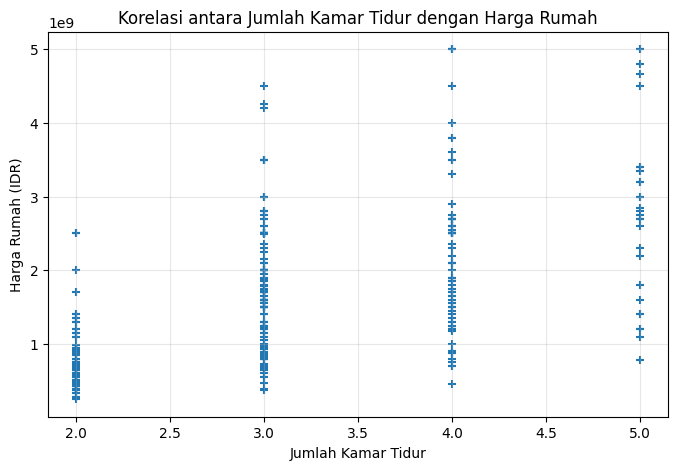

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Kamar Tidur'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Jumlah Kamar Tidur dengan Harga Rumah')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

Korelasi antara Jumlah Kamar Tidur dan Harga Rumah = 0.5731098665935641


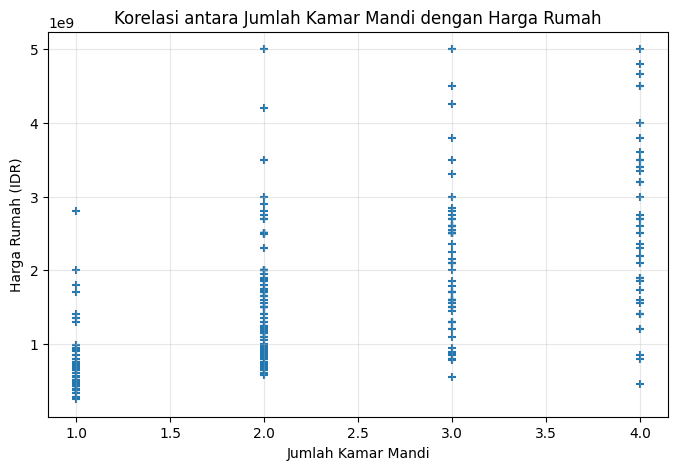

Korelasi antara Jumlah Kamar Mandi dan Harga Rumah = 0.5903151682314514


In [23]:
# Hitung nilai korelasi
corr_value = df_clean[['Kamar Tidur', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Jumlah Kamar Tidur dan Harga Rumah =", corr_value)

plt.figure(figsize=(8,5))
plt.scatter(df_clean['Kamar Mandi'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Jumlah Kamar Mandi dengan Harga Rumah')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

# Hitung nilai korelasi
corr_value = df_clean[['Kamar Mandi', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Jumlah Kamar Mandi dan Harga Rumah =", corr_value)

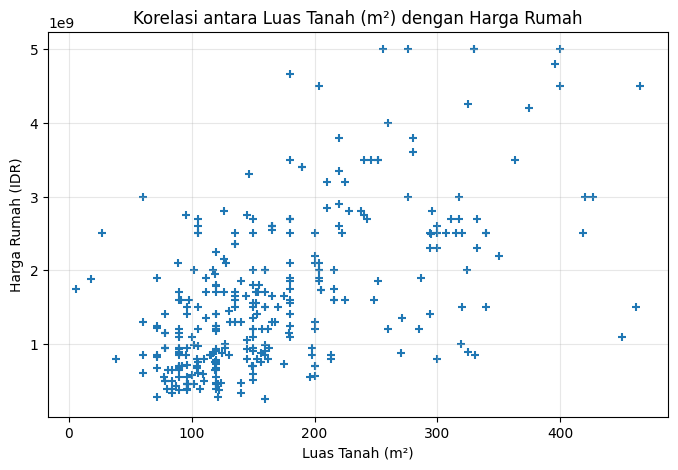

Korelasi antara Luas Tanah (m²) dan Harga Rumah = 0.5819066202649625


In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Luas Tanah (m²)'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Luas Tanah (m²) dengan Harga Rumah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

# Hitung nilai korelasi
corr_value = df_clean[['Luas Tanah (m²)', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Luas Tanah (m²) dan Harga Rumah =", corr_value)

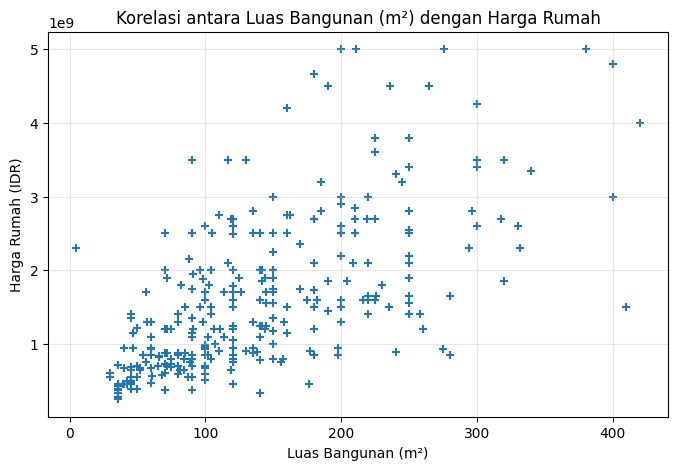

Korelasi antara Luas Bangunan (m²) dan Harga Rumah = 0.6343009287906934


In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Luas Bangunan (m²)'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Luas Bangunan (m²) dengan Harga Rumah')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

# Hitung nilai korelasi
corr_value = df_clean[['Luas Bangunan (m²)', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Luas Bangunan (m²) dan Harga Rumah =", corr_value)

In [26]:
# Filter manual untuk menghapus outlier ekstrem
df_clean = model_df[
    (model_df["Luas Tanah (m²)"] <= 350) &
    (model_df["Luas Bangunan (m²)"] <= 355) &
    (model_df["Harga (IDR)"] <= 4_500_000_000)
].copy()

print(f"Jumlah data sebelum cleaning: {len(model_df)}")
print(f"Jumlah data setelah cleaning : {len(df_clean)}")
print(f"Jumlah baris dihapus        : {len(model_df) - len(df_clean)}")

Jumlah data sebelum cleaning: 372
Jumlah data setelah cleaning : 309
Jumlah baris dihapus        : 63


In [27]:
pd.set_option("display.float_format", lambda x: f"{x:,.6f}")
df_clean.describe()

,Luas Tanah (m²),Luas Bangunan (m²),Kamar Tidur,Kamar Mandi,Daerah_Balikpapan Barat,Daerah_Balikpapan Kota,Daerah_Balikpapan Selatan,Daerah_Balikpapan Tengah,Daerah_Balikpapan Timur,Daerah_Balikpapan Utara,Harga (IDR)
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,159.035599,135.922330,3.220065,2.339806,0.006472,0.048544,0.527508,0.058252,0.074434,0.284790,"1,526,442,168.284790"
std,72.493363,75.413969,1.118086,1.147160,0.080321,0.215261,0.500053,0.234600,0.262901,0.452046,"871,701,173.444157"
min,4.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"250,000,000.000000"
25%,105.000000,80.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"820,000,000.000000"
50%,149.000000,120.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,"1,350,000,000.000000"
75%,200.000000,190.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,"2,100,000,000.000000"
max,350.000000,340.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"4,500,000,000.000000"


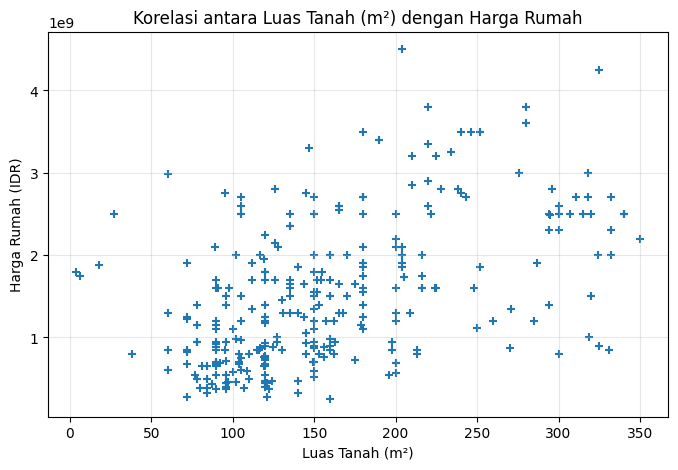

Korelasi antara Luas Tanah (m²) dan Harga Rumah = 0.506235424919514


In [28]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Luas Tanah (m²)'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Luas Tanah (m²) dengan Harga Rumah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

# Hitung nilai korelasi
corr_value = df_clean[['Luas Tanah (m²)', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Luas Tanah (m²) dan Harga Rumah =", corr_value)

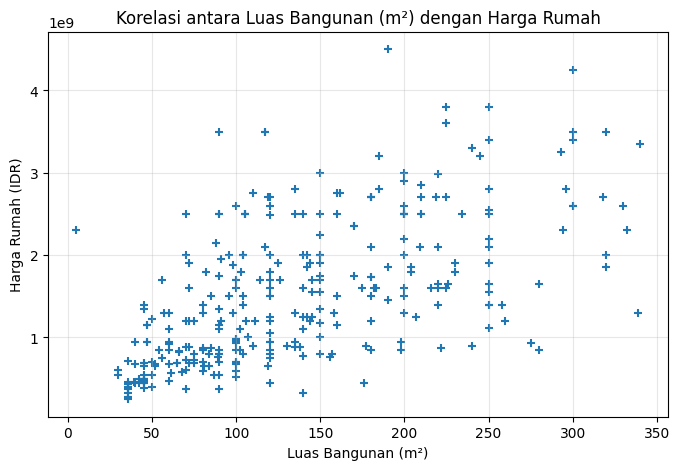

Korelasi antara Luas Bangunan (m²) dan Harga Rumah = 0.6046698332857627


In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Luas Bangunan (m²)'], df_clean['Harga (IDR)'], marker='+')
plt.title('Korelasi antara Luas Bangunan (m²) dengan Harga Rumah')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Rumah (IDR)')
plt.grid(True, alpha=0.3)
plt.show()

# Hitung nilai korelasi
corr_value = df_clean[['Luas Bangunan (m²)', 'Harga (IDR)']].corr().iloc[0,1]
print("Korelasi antara Luas Bangunan (m²) dan Harga Rumah =", corr_value)

In [35]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}") # format angka dengan 2 desimal

# Hapus indeks lama dan buat indeks baru (0, 1, 2, ...)
df_clean_reset = df_clean.reset_index(drop=True)

# Tampilkan seluruh DataFrame bersih
print(f"Jumlah baris setelah cleaning: {len(df_clean_reset)}")
display(df_clean_reset)

# Simpan ke CSV
# Gunakan DataFrame yang sudah di-reset indexnya
df_clean_reset.to_csv("data_final_bersih.csv", index=False)
print("Data final bersih dari outlier telah disimpan ke 'data_final_bersih.csv'.")

Jumlah baris setelah cleaning: 309


,Luas Tanah (m²),Luas Bangunan (m²),Kamar Tidur,Kamar Mandi,Daerah_Balikpapan Barat,Daerah_Balikpapan Kota,Daerah_Balikpapan Selatan,Daerah_Balikpapan Tengah,Daerah_Balikpapan Timur,Daerah_Balikpapan Utara,Harga (IDR)
0,250,250,1,1,0,0,1,0,0,0,"1,120,000,000.00"
1,90,60,2,1,0,0,0,1,0,0,"925,000,000.00"
2,100,68,2,2,0,0,1,0,0,0,"575,000,000.00"
3,92,72,3,2,0,0,0,1,0,0,"695,700,000.00"
4,144,280,3,2,0,0,1,0,0,0,"1,650,000,000.00"
5,213,90,3,1,0,0,1,0,0,0,"795,000,000.00"
6,120,145,4,2,0,0,1,0,0,0,"1,250,000,000.00"
7,120,250,3,2,0,0,1,0,0,0,"1,400,000,000.00"
8,165,220,4,2,0,0,0,0,0,1,"1,650,000,000.00"
9,180,320,4,4,0,0,0,0,0,1,"1,850,000,000.00"


Data final bersih dari outlier telah disimpan ke 'data_final_bersih.csv'.
